In [1]:
import findspark
findspark.init('/home/user/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('appointment').getOrCreate()


In [2]:
df = spark.read.csv('MedicalAppointment.csv',header=True,inferSchema=True)
df.show()

+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
|          PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Scholarship|Hipertension|Diabetes|Alcoholism|Handcap|SMS_received|No-show|
+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
| 2.9872499824296E13|      5642903|     F|2016-04-30 06:38:...|2016-04-29 12:00:...| 62|  JARDIM DA PENHA|          0|           1|       0|         0|      0|           0|     No|
|5.58997776694438E14|      5642503|     M|2016-04-30 04:08:...|2016-04-29 12:00:...| 56|  JARDIM DA PENHA|          0|           0|       0|         0|      0|           0|     No|
|  4.262962299951E12|      5642549|     F|2016-04-30 04:19:...|2016-04-29 12:00:...| 62|    MAT

In [3]:
df.printSchema()
#print(df.head(1))

root
 |-- PatientId: double (nullable = true)
 |-- AppointmentID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ScheduledDay: timestamp (nullable = true)
 |-- AppointmentDay: timestamp (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Neighbourhood: string (nullable = true)
 |-- Scholarship: integer (nullable = true)
 |-- Hipertension: integer (nullable = true)
 |-- Diabetes: integer (nullable = true)
 |-- Alcoholism: integer (nullable = true)
 |-- Handcap: integer (nullable = true)
 |-- SMS_received: integer (nullable = true)
 |-- No-show: string (nullable = true)



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

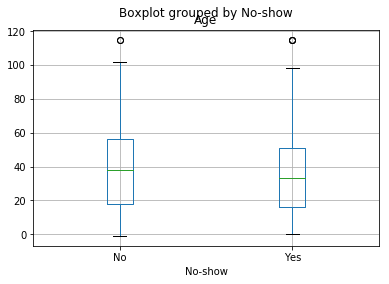

In [5]:
df1 = pd.read_csv('MedicalAppointment.csv')
df1.boxplot(column = 'Age', by = 'No-show')

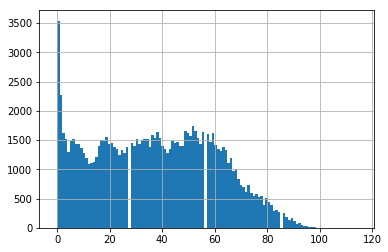

In [6]:
df1['Age'].hist(bins=120)

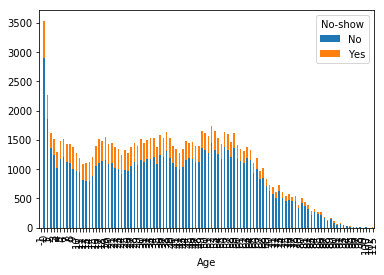

In [7]:
temp1=pd.crosstab(df1['Age'],df1['No-show'])
temp1.plot(kind='bar', xticks=[1,60,120], stacked = True)

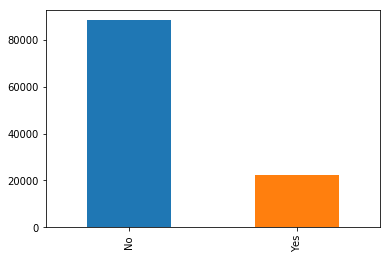

In [8]:
temp1 = df1['No-show'].value_counts()
temp1.plot(kind = 'bar')

In [9]:
df1['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

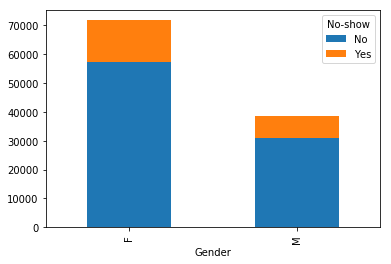

In [10]:
temp1 = pd.crosstab(df1['Gender'],df1['No-show'])
temp1.plot(kind = 'bar', stacked=True)

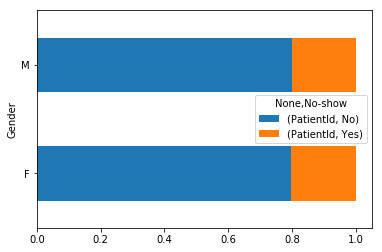

In [11]:
temp2=df1.pivot_table(values = ['PatientId'],columns='No-show', index = 'Gender', aggfunc = 'count')
temp2=temp2.div(temp2.sum(1),axis=0)
temp2.plot(kind='barh',stacked=True)

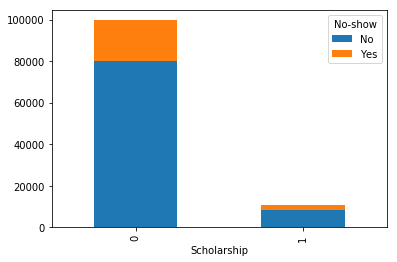

In [12]:
temp1 = pd.crosstab(df1['Scholarship'],df1['No-show'])
temp1.plot(kind = 'bar', stacked=True)

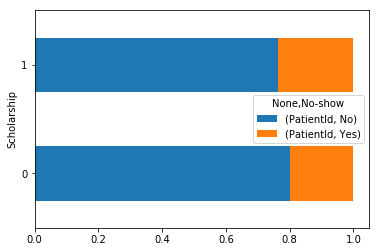

In [13]:
temp2=df1.pivot_table(values = ['PatientId'],columns='No-show', index = 'Scholarship', aggfunc = 'count')
temp2=temp2.div(temp2.sum(1),axis=0)
temp2.plot(kind='barh',stacked=True)

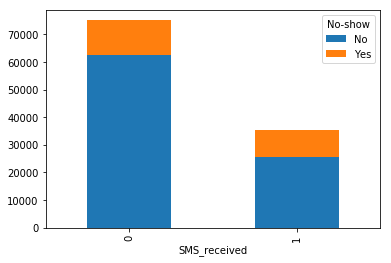

In [14]:
temp1 = pd.crosstab(df1['SMS_received'],df1['No-show'])
temp1.plot(kind = 'bar', stacked=True)

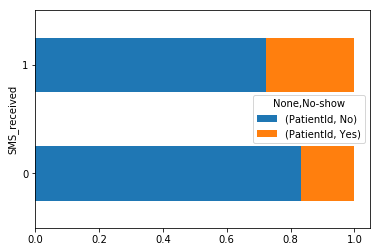

In [15]:
temp2=df1.pivot_table(values = ['PatientId'],columns='No-show', index = 'SMS_received', aggfunc = 'count')
temp2=temp2.div(temp2.sum(1),axis=0)
temp2.plot(kind='barh',stacked=True)

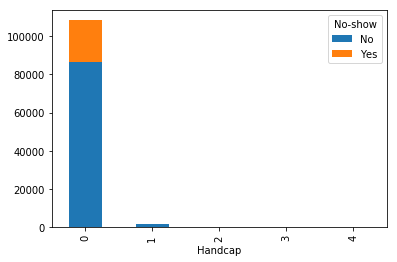

In [16]:
temp1 = pd.crosstab(df1['Handcap'],df1['No-show'])
temp1.plot(kind = 'bar', stacked=True)

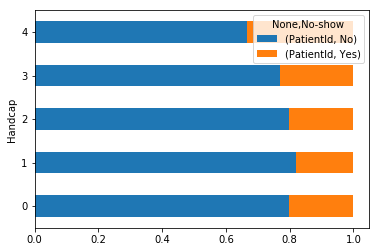

In [17]:
temp2=df1.pivot_table(values = ['PatientId'],columns='No-show', index = 'Handcap', aggfunc = 'count')
temp2=temp2.div(temp2.sum(1),axis=0)
temp2.plot(kind='barh',stacked=True)

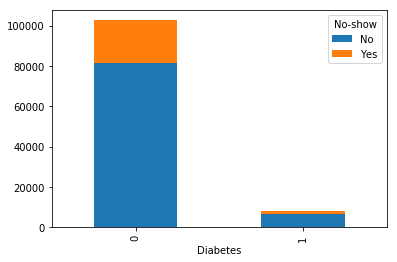

In [18]:
temp1 = pd.crosstab(df1['Diabetes'],df1['No-show'])
temp1.plot(kind = 'bar', stacked=True)

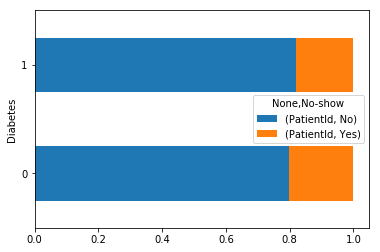

In [19]:
temp2=df1.pivot_table(values = ['PatientId'],columns='No-show', index = 'Diabetes', aggfunc = 'count')
temp2=temp2.div(temp2.sum(1),axis=0)
temp2.plot(kind='barh',stacked=True)

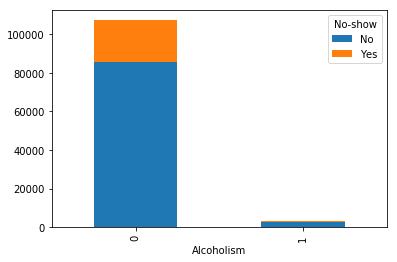

In [20]:
temp1 = pd.crosstab(df1['Alcoholism'],df1['No-show'])
temp1.plot(kind = 'bar', stacked=True)

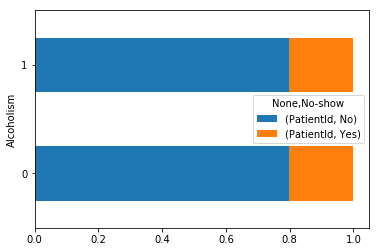

In [21]:
temp2=df1.pivot_table(values = ['PatientId'],columns='No-show', index = 'Alcoholism', aggfunc = 'count')
temp2=temp2.div(temp2.sum(1),axis=0)
temp2.plot(kind='barh',stacked=True)

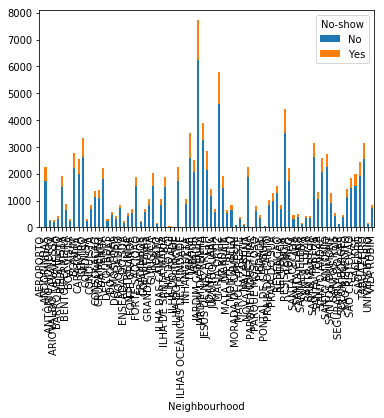

In [22]:
temp1 = pd.crosstab(df1['Neighbourhood'],df1['No-show'])
temp1.plot(kind = 'bar', stacked=True)

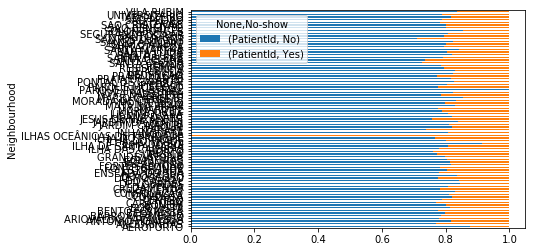

In [23]:
temp2=df1.pivot_table(values = ['PatientId'],columns='No-show', index = 'Neighbourhood', aggfunc = 'count')
temp2=temp2.div(temp2.sum(1),axis=0)
temp2.plot(kind='barh',stacked=True)

In [24]:
df2=df1.drop(['PatientId','AppointmentID'],axis = 1)

In [25]:
df2['ScheduledDay'] = df2['ScheduledDay'].str[0:10]
df2['AppointmentDay'] = df2['AppointmentDay'].str[0:10]

In [26]:
df2['BookingInAdvance'] = pd.to_datetime(df2['AppointmentDay'])-pd.to_datetime(df2['ScheduledDay'])
df2['BookingInAdvance']=df2['BookingInAdvance'].dt.days
df2

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,BookingInAdvance
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2


In [27]:
df2.dtypes

Gender              object
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handcap              int64
SMS_received         int64
No-show             object
BookingInAdvance     int64
dtype: object

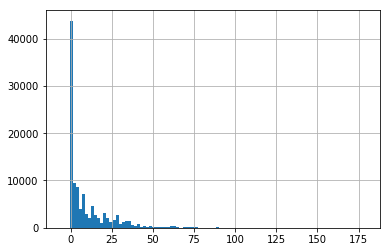

In [28]:
df2['BookingInAdvance'].hist(bins=100)

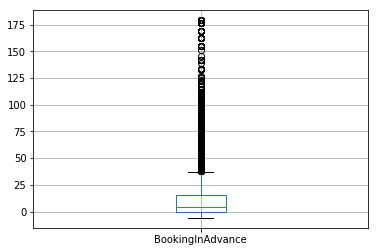

In [29]:
df2.boxplot(column = 'BookingInAdvance')

In [30]:
df2=df2.rename(columns = {'Handcap':'Handicap', 'Hipertension':'Hypertension', 'SMS_received':'SMSreceived', 'No-show':'NoShow'})

In [31]:
df2['Gender'] = df2.Gender.astype('category')
df2['Neighbourhood'] = df2.Neighbourhood.astype('category')
df2['NoShow'] = df2.NoShow.astype('category')
df2['Scholarship'] = df2.Scholarship.astype('bool')
df2['Diabetes'] = df2.Diabetes.astype('bool')
df2['Hypertension'] = df2.Hypertension.astype('bool')
df2['Alcoholism'] = df2.Alcoholism.astype('bool')
df2['SMSreceived'] = df2.SMSreceived.astype('bool')
df2.dtypes

Gender              category
ScheduledDay          object
AppointmentDay        object
Age                    int64
Neighbourhood       category
Scholarship             bool
Hypertension            bool
Diabetes                bool
Alcoholism              bool
Handicap               int64
SMSreceived             bool
NoShow              category
BookingInAdvance       int64
dtype: object

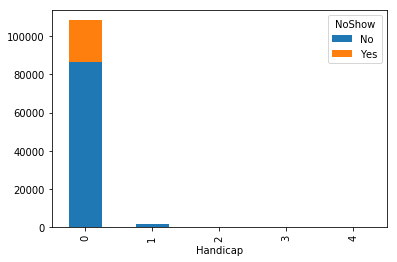

In [32]:
temp1 = pd.crosstab(df2['Handicap'],df2['NoShow'])
temp1.plot(kind = 'bar', stacked=True)

In [33]:
df2.count

<bound method DataFrame.count of        Gender ScheduledDay AppointmentDay  Age      Neighbourhood  \
0           F   2016-04-29     2016-04-29   62    JARDIM DA PENHA   
1           M   2016-04-29     2016-04-29   56    JARDIM DA PENHA   
2           F   2016-04-29     2016-04-29   62      MATA DA PRAIA   
3           F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI   
4           F   2016-04-29     2016-04-29   56    JARDIM DA PENHA   
5           F   2016-04-27     2016-04-29   76          REPÚBLICA   
6           F   2016-04-27     2016-04-29   23         GOIABEIRAS   
7           F   2016-04-27     2016-04-29   39         GOIABEIRAS   
8           F   2016-04-29     2016-04-29   21         ANDORINHAS   
9           F   2016-04-27     2016-04-29   19          CONQUISTA   
10          F   2016-04-27     2016-04-29   30     NOVA PALESTINA   
11          M   2016-04-26     2016-04-29   29     NOVA PALESTINA   
12          F   2016-04-28     2016-04-29   22     NOVA PALESTINA   
1

In [34]:
df2=df2[df2.Age >= 0]
df2=df2[df2.Age <= 90]
#df2.count

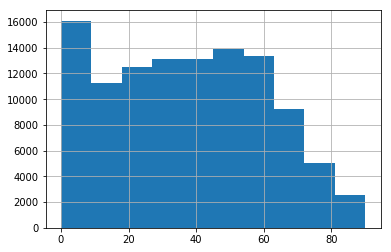

In [35]:
df2['Age'].hist(bins=10)

In [36]:
df2=df2[df2.BookingInAdvance >= 0]
df2=df2[df2.BookingInAdvance <= 40]
df2.count

<bound method DataFrame.count of        Gender ScheduledDay AppointmentDay  Age      Neighbourhood  \
0           F   2016-04-29     2016-04-29   62    JARDIM DA PENHA   
1           M   2016-04-29     2016-04-29   56    JARDIM DA PENHA   
2           F   2016-04-29     2016-04-29   62      MATA DA PRAIA   
3           F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI   
4           F   2016-04-29     2016-04-29   56    JARDIM DA PENHA   
5           F   2016-04-27     2016-04-29   76          REPÚBLICA   
6           F   2016-04-27     2016-04-29   23         GOIABEIRAS   
7           F   2016-04-27     2016-04-29   39         GOIABEIRAS   
8           F   2016-04-29     2016-04-29   21         ANDORINHAS   
9           F   2016-04-27     2016-04-29   19          CONQUISTA   
10          F   2016-04-27     2016-04-29   30     NOVA PALESTINA   
11          M   2016-04-26     2016-04-29   29     NOVA PALESTINA   
12          F   2016-04-28     2016-04-29   22     NOVA PALESTINA   
1

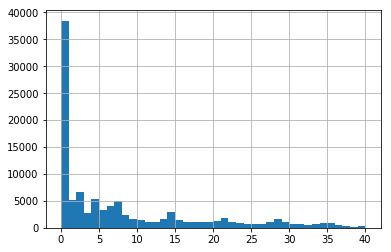

In [37]:
df2['BookingInAdvance'].hist(bins=40)

In [38]:
def func(row):
    if row['BookingInAdvance'] == 0:
        return 'on the day'
    elif row['BookingInAdvance'] > 4:
        return 'more than 4 days'
    else:
        return '1-4 days'
    
df2['Booking']=df2.apply(func, axis=1)
df2

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow,BookingInAdvance,Booking
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,No,0,on the day
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,No,0,on the day
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,No,0,on the day
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No,0,on the day
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,No,0,on the day
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,0,False,No,2,1-4 days
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,0,False,Yes,2,1-4 days
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,0,False,Yes,2,1-4 days
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,False,0,False,No,0,on the day
9,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,0,False,No,2,1-4 days


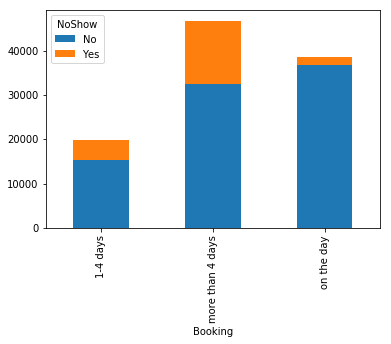

In [39]:
temp1 = pd.crosstab(df2['Booking'],df2['NoShow'])
temp1.plot(kind = 'bar', stacked=True)

In [40]:
df2['Booking'] = df2.Booking.astype('category')
df2.dtypes

Gender              category
ScheduledDay          object
AppointmentDay        object
Age                    int64
Neighbourhood       category
Scholarship             bool
Hypertension            bool
Diabetes                bool
Alcoholism              bool
Handicap               int64
SMSreceived             bool
NoShow              category
BookingInAdvance       int64
Booking             category
dtype: object

In [41]:
df3=df2.drop(['ScheduledDay','AppointmentDay','Handicap'],axis = 1)
df3

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMSreceived,NoShow,BookingInAdvance,Booking
0,F,62,JARDIM DA PENHA,False,True,False,False,False,No,0,on the day
1,M,56,JARDIM DA PENHA,False,False,False,False,False,No,0,on the day
2,F,62,MATA DA PRAIA,False,False,False,False,False,No,0,on the day
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,No,0,on the day
4,F,56,JARDIM DA PENHA,False,True,True,False,False,No,0,on the day
5,F,76,REPÚBLICA,False,True,False,False,False,No,2,1-4 days
6,F,23,GOIABEIRAS,False,False,False,False,False,Yes,2,1-4 days
7,F,39,GOIABEIRAS,False,False,False,False,False,Yes,2,1-4 days
8,F,21,ANDORINHAS,False,False,False,False,False,No,0,on the day
9,F,19,CONQUISTA,False,False,False,False,False,No,2,1-4 days


In [42]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [43]:
df3.dtypes

Gender              category
Age                    int64
Neighbourhood       category
Scholarship             bool
Hypertension            bool
Diabetes                bool
Alcoholism              bool
SMSreceived             bool
NoShow              category
BookingInAdvance       int64
Booking             category
dtype: object

In [44]:
var_mod=['Gender','Age','Neighbourhood','Scholarship','Hypertension',
         'Diabetes','Alcoholism', 'SMSreceived','Booking','NoShow']
le=LabelEncoder()
for i in var_mod:
    df3[i]=le.fit_transform(df3[i])
    
df3.dtypes

Gender              int64
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
SMSreceived         int64
NoShow              int64
BookingInAdvance    int64
Booking             int64
dtype: object

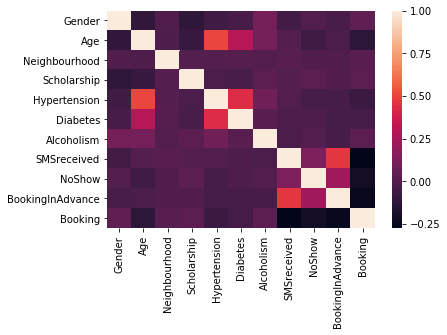

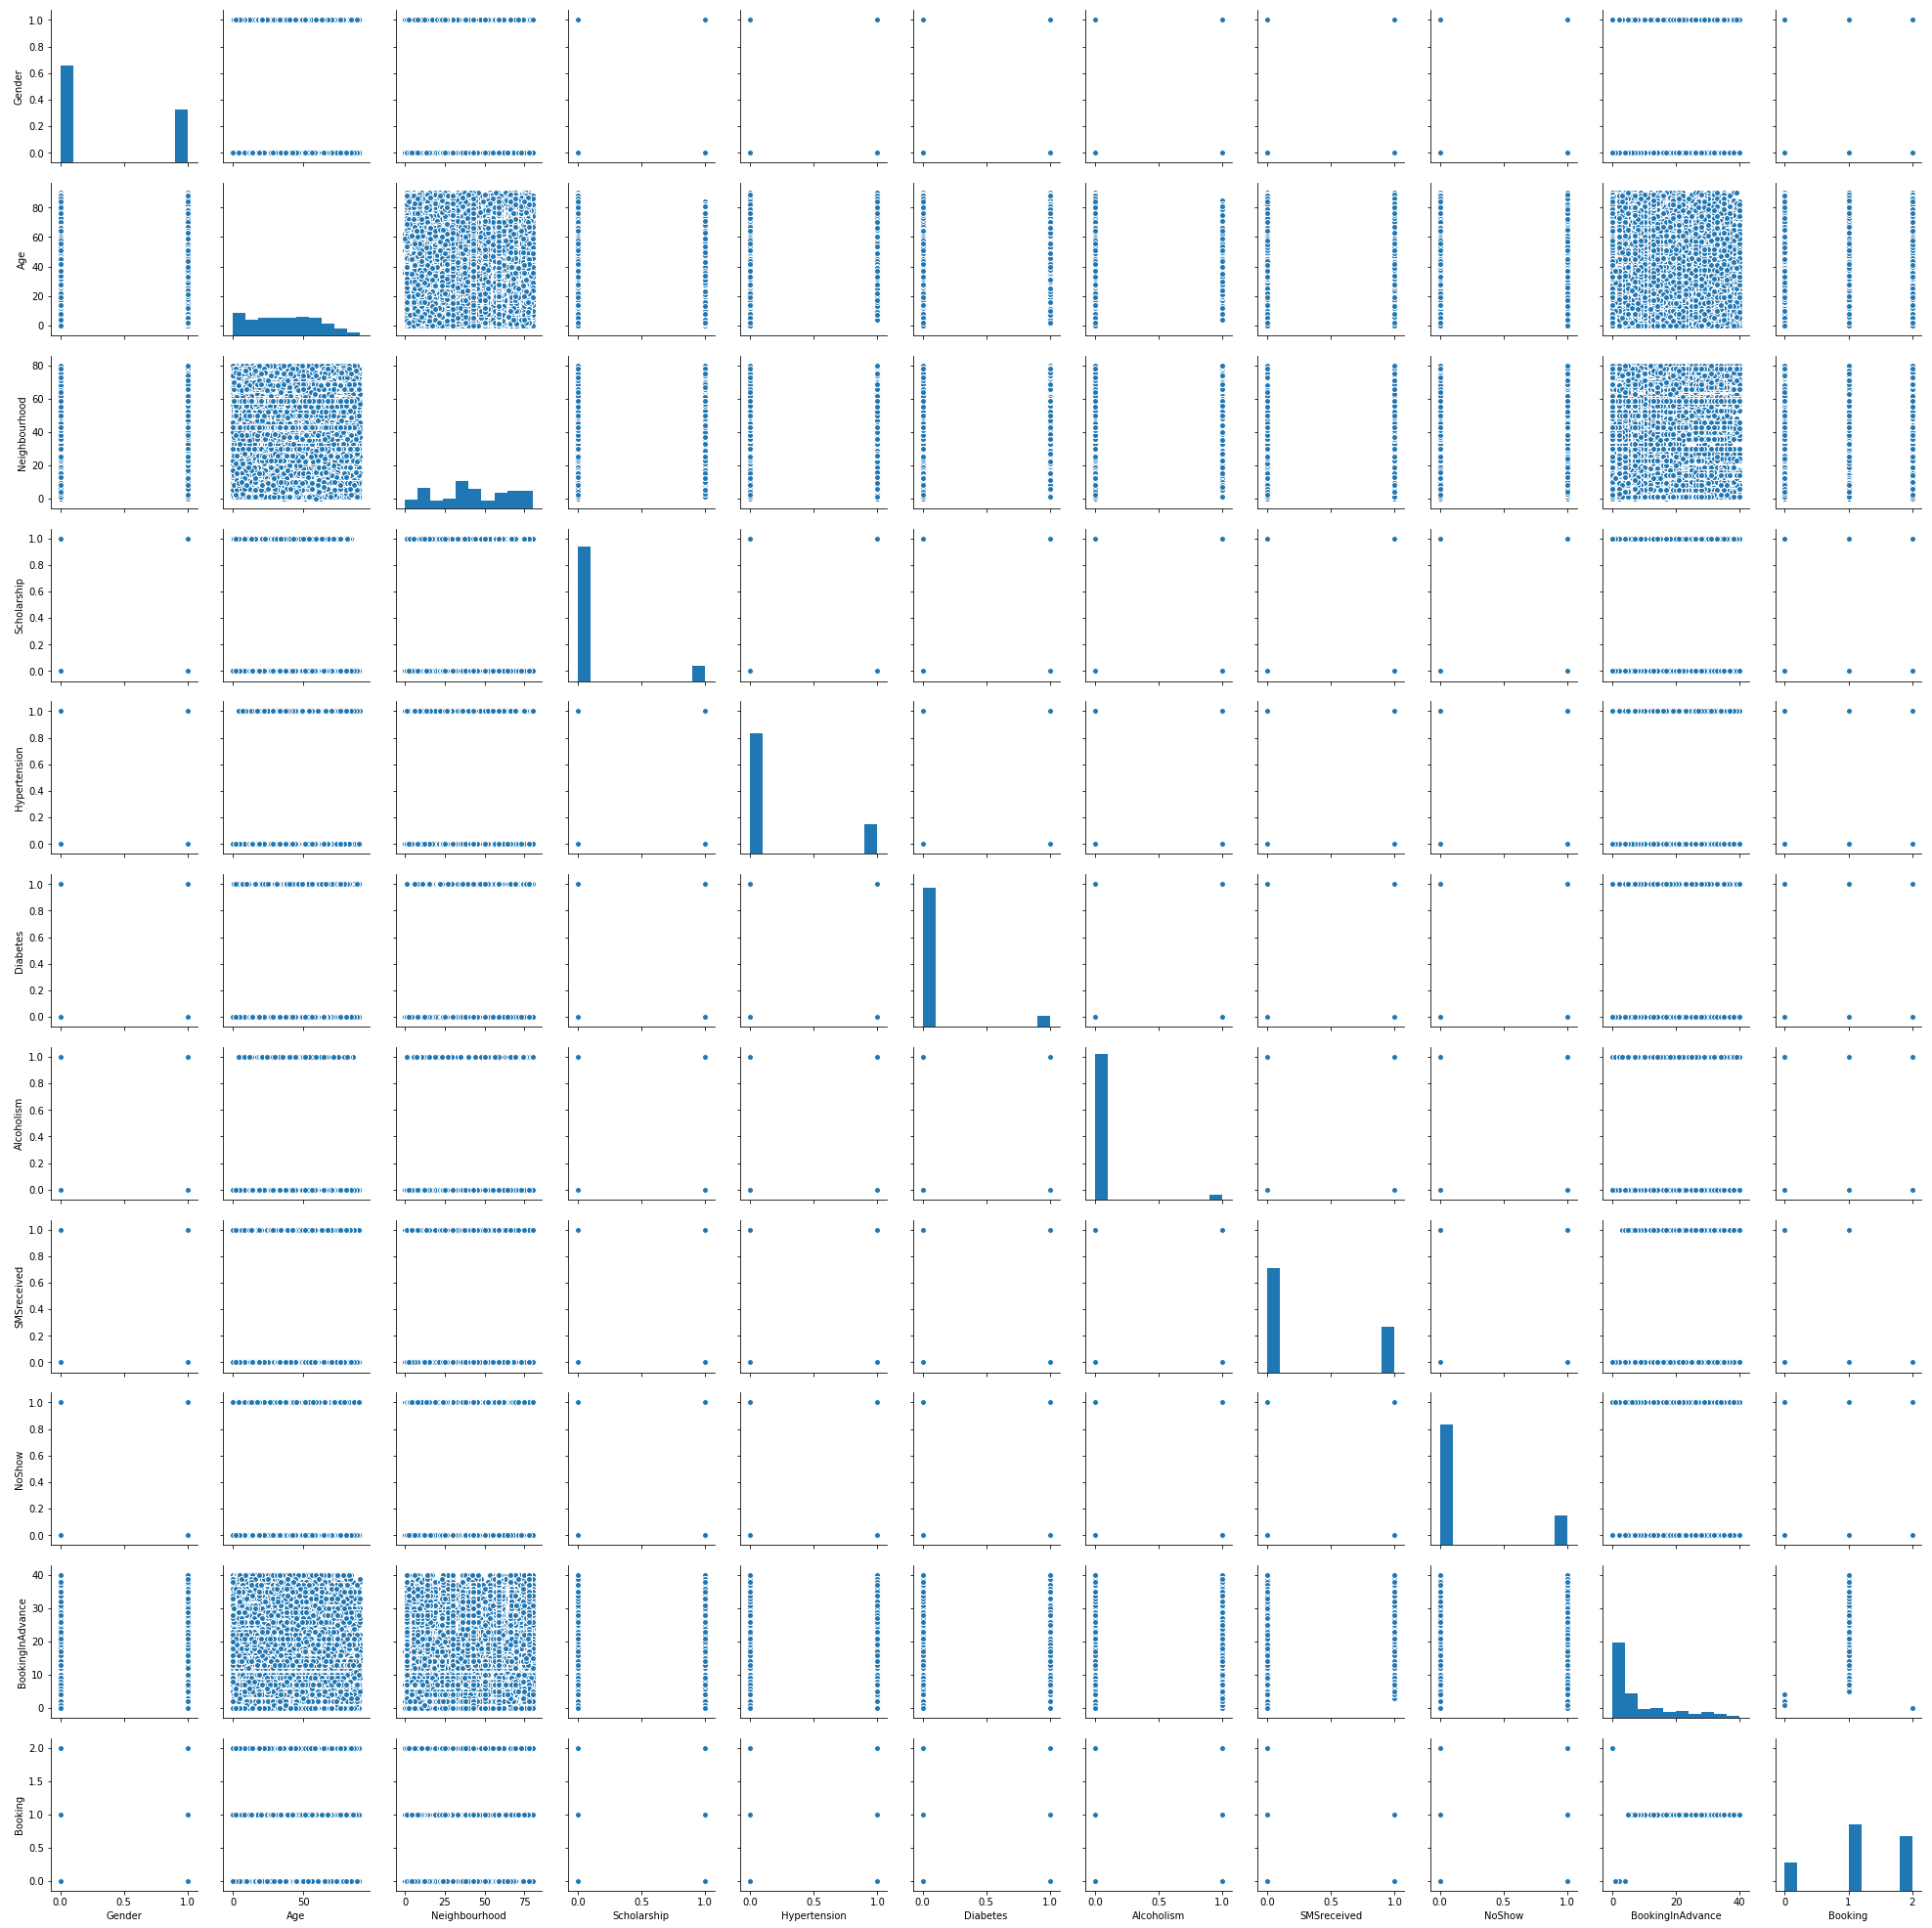

In [45]:
import seaborn as sns
corr=df3.corr()
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
sns.pairplot(df3)

In [46]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])  
    predictions = model.predict(data[predictors])    
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy:%s" % "{0:.3%}".format(accuracy))
    kf = KFold(data.shape[0], n_folds=5)
    error=[]
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print('Cross-Validation Score: %s' % '{0:.3%}'.format(np.mean(error)))
    model.fit(data[predictors],data[outcome])

outcome_var='NoShow'

In [47]:
model = DecisionTreeClassifier()
predictor_var = ['Gender','Age','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism', 'SMSreceived','Booking']
classification_model(model, df3, predictor_var, outcome_var)

Accuracy:88.473%
Cross-Validation Score: 74.983%


In [48]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender','Age','Neighbourhood','Scholarship','Hypertension',
                 'Diabetes','Alcoholism', 'SMSreceived','Booking']
classification_model(model, df3, predictor_var, outcome_var)

Accuracy:88.470%
Cross-Validation Score: 75.841%


In [49]:
featimp =pd.Series(model.feature_importances_, index = predictor_var).sort_values(ascending = False)
print (featimp)

Neighbourhood    0.431769
Age              0.373445
Booking          0.133068
SMSreceived      0.017873
Gender           0.015254
Hypertension     0.008640
Scholarship      0.007249
Diabetes         0.006927
Alcoholism       0.005775
dtype: float64


In [50]:
model = RandomForestClassifier(n_estimators=25, min_samples_split = 25, max_depth = 7, max_features = 1)
predictor_var = ['Neighbourhood','Age','Booking']
classification_model(model, df3, predictor_var, outcome_var)

Accuracy:80.368%
Cross-Validation Score: 80.368%
